In [19]:
# import pandas_datareader.data as reader
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [20]:
end = dt.datetime.now()
start = dt.date(end.year, end.month - 3, end.day)
stocks = ['MSFT', 'AAPL', 'GE', '^GSPC']


In [21]:
df = yf.download(stocks, start=start, end=end)

[*********************100%%**********************]  4 of 4 completed


In [22]:
df.head()

Price        Adj Close                                            Close  \
Ticker            AAPL          GE        MSFT        ^GSPC        AAPL   
Date                                                                      
2024-03-04  174.862823  128.271423  414.172974  5130.950195  175.100006   
2024-03-05  169.889572  125.761917  401.925018  5078.649902  170.119995   
2024-03-06  168.890915  127.068451  401.366028  5104.759766  169.119995   
2024-03-07  168.771088  132.645126  408.403381  5157.359863  169.000000   
2024-03-08  170.498734  133.808258  405.488617  5123.689941  170.729996   

Price                                                  High              ...  \
Ticker              GE        MSFT        ^GSPC        AAPL          GE  ...   
Date                                                                     ...   
2024-03-04  128.499603  414.920013  5130.950195  176.899994  129.106140  ...   
2024-03-05  125.985634  402.649994  5078.649902  172.039993  129.409424  ...   
2024-03-06  127.294495  402.089996  5104.759766  171.240005  128.475662  ...   
2024-03-07  132.881088  409.140015  5157.359863  170.729996  133.064651  ...   
2024-03-08  134.046295  406.220001  5123.689941  173.699997  140.311249  ...   

Price              Low                     Open                          \
Ticker            MSFT        ^GSPC        AAPL          GE        MSFT   
Date                                                                      
2024-03-04  412.320007  5127.180176  176.149994  127.190742  413.440002   
2024-03-05  400.640015  5056.819824  170.759995  128.906631  413.959991   
2024-03-06  398.390015  5092.220215  171.059998  126.975258  402.970001   
2024-03-07  402.239990  5128.209961  169.149994  129.321625  406.119995   
2024-03-08  404.329987  5117.500000  169.000000  135.283325  407.959991   

Price                      Volume                                  
Ticker            ^GSPC      AAPL        GE      MSFT       ^GSPC  
Date                                                               
2024-03-04  5130.990234  81510100   8402242  17596000  4758440000  
2024-03-05  5110.520020  95132400   8003663  26919200  4418410000  
2024-03-06  5108.029785  68587700   8198755  22344100  4559050000  
2024-03-07  5132.379883  71765100  14393838  18718500  4137980000  
2024-03-08  5164.459961  76114600  21242234  17971700  4208870000  

[5 rows x 24 columns]

In [23]:
df = df['Adj Close']

In [24]:
df.head()

Ticker,AAPL,GE,MSFT,^GSPC
Date,,,,
2024-03-04,174.862823,128.271423,414.172974,5130.950195
2024-03-05,169.889572,125.761917,401.925018,5078.649902
2024-03-06,168.890915,127.068451,401.366028,5104.759766
2024-03-07,168.771088,132.645126,408.403381,5157.359863
2024-03-08,170.498734,133.808258,405.488617,5123.689941


In [25]:
import prophet

In [26]:
model = prophet.Prophet()

In [27]:
df = df.reset_index()

In [28]:
df

Ticker,Date,AAPL,GE,MSFT,^GSPC
0,2024-03-04,174.862823,128.271423,414.172974,5130.950195
1,2024-03-05,169.889572,125.761917,401.925018,5078.649902
2,2024-03-06,168.890915,127.068451,401.366028,5104.759766
3,2024-03-07,168.771088,132.645126,408.403381,5157.359863
4,2024-03-08,170.498734,133.808258,405.488617,5123.689941
...,...,...,...,...,...
59,2024-05-28,189.990005,168.559998,430.320007,5306.040039
60,2024-05-29,190.289993,163.600006,429.170013,5266.950195
61,2024-05-30,191.289993,164.199997,414.670013,5235.479980
62,2024-05-31,192.250000,165.139999,415.130005,5277.509766


In [29]:
df[["ds",'y']] = df[["Date", "GE"]]

In [30]:
df

Ticker,Date,AAPL,GE,MSFT,^GSPC,ds,y
0,2024-03-04,174.862823,128.271423,414.172974,5130.950195,2024-03-04,128.271423
1,2024-03-05,169.889572,125.761917,401.925018,5078.649902,2024-03-05,125.761917
2,2024-03-06,168.890915,127.068451,401.366028,5104.759766,2024-03-06,127.068451
3,2024-03-07,168.771088,132.645126,408.403381,5157.359863,2024-03-07,132.645126
4,2024-03-08,170.498734,133.808258,405.488617,5123.689941,2024-03-08,133.808258
...,...,...,...,...,...,...,...
59,2024-05-28,189.990005,168.559998,430.320007,5306.040039,2024-05-28,168.559998
60,2024-05-29,190.289993,163.600006,429.170013,5266.950195,2024-05-29,163.600006
61,2024-05-30,191.289993,164.199997,414.670013,5235.479980,2024-05-30,164.199997
62,2024-05-31,192.250000,165.139999,415.130005,5277.509766,2024-05-31,165.139999


In [31]:
model.fit(df[["ds",'y']])

22:52:59 - cmdstanpy - INFO - Chain [1] start processing
22:52:59 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = model.make_future_dataframe(periods=30)

In [38]:
future

,ds
0,2024-03-04
1,2024-03-05
2,2024-03-06
3,2024-03-07
4,2024-03-08
...,...
89,2024-06-29
90,2024-06-30
91,2024-07-01
92,2024-07-02


In [39]:
forecast = model.predict(future)

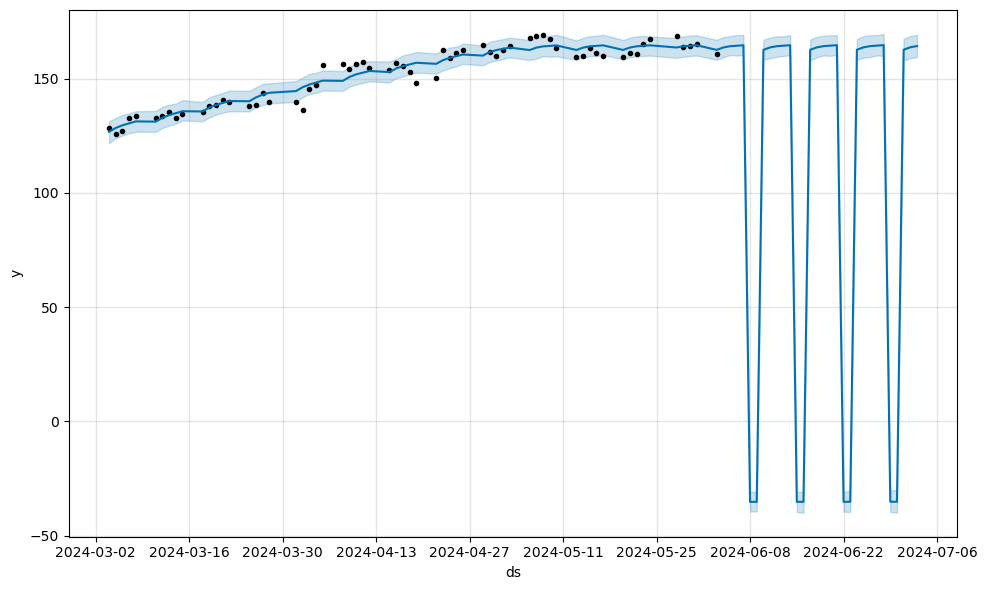

In [40]:
model.plot(forecast)
plt.show()

: 